<a href="https://colab.research.google.com/github/GreggHeller1/Neuron_Tutorial/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(in_colab)

False


In [2]:
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/PMT_linearization.git

In [3]:
#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/PMT_linearization

from src import data_io as io
from src import plotting
from src import computation as comp
from src import main

In [4]:
#imports
from matplotlib import pyplot as plt
import os
import numpy as np

In [5]:
#define paths
#cwd if in colab for file loading to work
if in_colab:
    %cd /content/PMT_linearization/scripts
    
test_path = os.path.join('demo_data', 'test.txt')
print(test_path)
print(os.getcwd())
os.path.exists(test_path)

demo_data/test.txt
/Users/greggoryheller/Documents/code/PMT_linearization/scripts


True

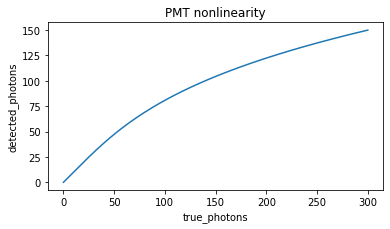

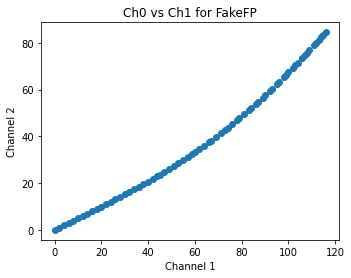

In [6]:

fp = 'FakeFP'
x = np.arange(0, 350)
x, y = comp.fake_pmt_n(x)
fig, ax = plotting.plot_pmt_nonlinearity(x, y)



fake_ratio = 2.
fake_true_photons, fake_green_channel = comp.fake_pmt_n(np.arange(0,140,fake_ratio))

fake_x2, fake_red_channel = comp.fake_pmt_n(fake_true_photons/fake_ratio, round=False)
channel_i = 0
channel_j = 1
fig, ax, title = plotting.plot_channels(fake_green_channel, fake_red_channel, channel_i, channel_j, alpha=1, label=fp)
io.savefig(fig, title)

/Users/greggoryheller/opt/anaconda3/envs/PMT_linearization/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/greggoryheller/opt/anaconda3/envs/PMT_linearization/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


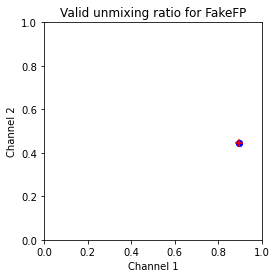

In [7]:
#data manipulation

xs, ys, xs_per_y = comp.get_unmixing_ratio(fake_green_channel, fake_red_channel)
fig, ax, title = plotting.plot_unmixing_vectors(xs, ys, channel_i, channel_j, label=fp, plot=True)
io.savefig(fig, title)

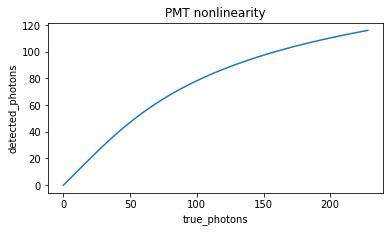

In [8]:

detected_photons, true_photons = comp.compute_PMT_nonlinearity(fake_green_channel, fake_red_channel, xs_per_y)
#whats the best way to handle X possibly being larger than y? we want to get the same curve either way. 

#Plot the inferred nonlinearity and see if it matches
fig, ax = plotting.plot_pmt_nonlinearity(true_photons, detected_photons)
io.savefig(fig, f'PMT curve from {fp} on {channel_i}{channel_j}')


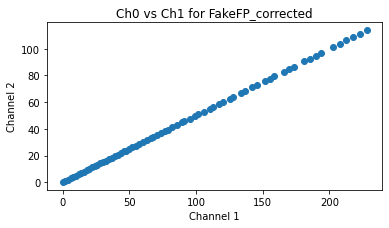

In [9]:

#use the inferred nonlinearity to correct both channels then plot. The result should be linear
corrected_green = []
corrected_red = []

for g,r in zip(fake_green_channel, fake_red_channel):
    try:
        corrected_green.append(comp.correct_PMT_nonlinearity(g, detected_photons, true_photons))
        corrected_red.append(comp.correct_PMT_nonlinearity(r, detected_photons, true_photons))
    except Exception as E:
        print(g,r)

fig, ax, title = plotting.plot_channels(corrected_green, corrected_red, channel_i, channel_j, alpha=1, label=f'{fp}_corrected')
io.savefig(fig, title)


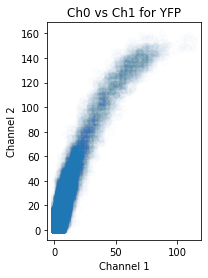

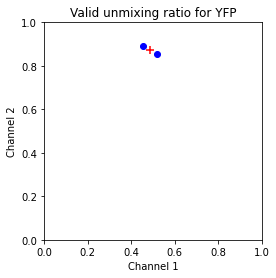

switching axis


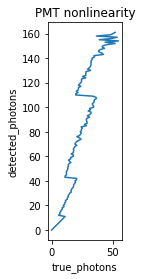

############


In [ ]:
#Now lets do it with an image of actual flourophores

filename = "YFP_10us__STACK.tiff"
filepath = os.path.join('demo_data', filename)
os.path.exists(filepath)

im = io.imread(filepath)
fp = comp.fp_from_tiffname(filename)

for i in range(im.shape[3]):
    for j in range(im.shape[3]):
        if j>i:
            main.main(fp, i, j, im[:,:,:,i].flatten(), im[:,:,:,j].flatten(), alpha=.01)



In [ ]:
#data output

filename = "YFP_10us__STACK.tiff"
idx = filename.lower().find('fp')
filename[idx-1:idx+2]

In [ ]:

l = ('a', 'b')
os.path.join(*l)


In [ ]:
main.main('FakeFP', 4, 6, fake_red_channel, fake_green_channel, alpha=1)